# Data Preparation

## List of tables used:
- studentInfo (main demographics file)
- studentAssessment and assessments (for individual grades)
- courses (for course characteristics)


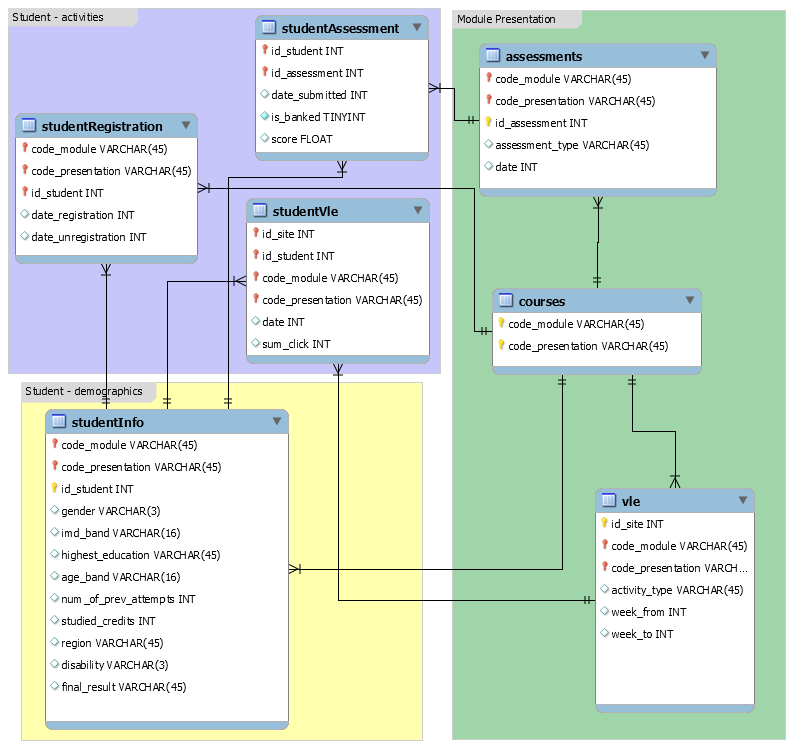

In [14]:
# Import Libraries
import pandas as pd
import numpy as np

In [15]:
# Read the .csv files from Data directory
studentInfoDf = pd.read_csv('../Data/studentInfo.csv')
studentAssessmentDf = pd.read_csv('../Data/studentAssessment.csv')
assessmentsDf = pd.read_csv('../Data/assessments.csv')
coursesDf = pd.read_csv('../Data/courses.csv')

In [16]:
# Print information about the DataFrames
print(studentInfoDf.info())
print(studentAssessmentDf.info())
print(assessmentsDf.info())
print(coursesDf.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-N

In [17]:
# Display the first 5 rows of the studentInfoDf dataframe
print(studentInfoDf.head())

# Display the first 5 rows of the studentAssessmentDf dataframe
print(studentAssessmentDf.head())

# Display the first 5 rows of the assessmentsDf dataframe
print(assessmentsDf.head())

# Display the first 5 rows of the coursesDf dataframe
print(coursesDf.head())

  code_module code_presentation  id_student gender                region  \
0         AAA             2013J       11391      M   East Anglian Region   
1         AAA             2013J       28400      F              Scotland   
2         AAA             2013J       30268      F  North Western Region   
3         AAA             2013J       31604      F     South East Region   
4         AAA             2013J       32885      F  West Midlands Region   

       highest_education imd_band age_band  num_of_prev_attempts  \
0       HE Qualification  90-100%     55<=                     0   
1       HE Qualification   20-30%    35-55                     0   
2  A Level or Equivalent   30-40%    35-55                     0   
3  A Level or Equivalent   50-60%    35-55                     0   
4     Lower Than A Level   50-60%     0-35                     0   

   studied_credits disability final_result  
0              240          N         Pass  
1               60          N         Pass  

In [18]:
# Check if there is missing data in the 4 dataframes
print("studentInfoDf:", '\n', studentInfoDf.isnull().sum())
print("studentAssessmentDf:", '\n', studentAssessmentDf.isnull().sum())
print("assessmentsDf:", '\n', assessmentsDf.isnull().sum())
print("coursesDf:", '\n', coursesDf.isnull().sum())


studentInfoDf: 
 code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64
studentAssessmentDf: 
 id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64
assessmentsDf: 
 code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64
coursesDf: 
 code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64


We will need to clean 2 data frames:
- studentAssement by removing the assessments with no grades
- studentInfo by removing students with no no imd_band

In [19]:
# Remove assessment rows with missing scores
studentAssessmentDf = studentAssessmentDf.dropna(subset=['score'])
print("studentAssessmentDf", '\n', studentAssessmentDf.isnull().sum())
print(studentAssessmentDf.info())

studentAssessmentDf 
 id_assessment     0
id_student        0
date_submitted    0
is_banked         0
score             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 173739 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173739 non-null  int64  
 1   id_student      173739 non-null  int64  
 2   date_submitted  173739 non-null  int64  
 3   is_banked       173739 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 8.0 MB
None


In [29]:
# Remove student rows with missing imd_band values
studentInfoDf = studentInfoDf.dropna(subset=['imd_band'])
print("studentInfoDf:", '\n', studentInfoDf.isnull().sum())
print(studentInfoDf.info())


studentInfoDf: 
 code_module             0
code_presentation       0
id_student              0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 25714 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           25714 non-null  object
 1   code_presentation     25714 non-null  object
 2   id_student            25714 non-null  int64 
 3   gender                25714 non-null  object
 4   region                25714 non-null  object
 5   highest_education     25714 non-null  object
 6   imd_band              25714 non-null  object
 7   age_band              25714 non-null  object
 8   num_of_prev_attempts  25714 non-null  int64 
 9  

In [30]:
# Remove studnet rows with final_result = 'Withdrawn'
studentInfoDf = studentInfoDf[studentInfoDf.final_result != 'Withdrawn']

In [31]:
# Get unique id_student values from both dataframes
unique_studentInfoDf = set(studentInfoDf['id_student'].unique())
unique_studentAssessmentDf = set(studentAssessmentDf['id_student'].unique())

# Count the number of unique id_student values in studentInfoDf but not in studentAssessmentDf
count_studentInfoDf = len(unique_studentInfoDf - unique_studentAssessmentDf)

# Count the number of unique id_student values in studentAssessmentDf but not in studentInfoDf
count_studentAssessmentDf = len(unique_studentAssessmentDf - unique_studentInfoDf)

# Output the counts as a tuple
output = (count_studentInfoDf, count_studentAssessmentDf)
output


(0, 3298)

There are 5,344 student values in studentInfoDf but not in studentAssessmentDf and 881 student values in studentAssessmentDf, but not in studentInfoDf

In [32]:
# Assuming studentInfoDf and studentAssessmentDf are DataFrames and have a column named 'id_student'
common_students = set(studentInfoDf['id_student']).intersection(set(studentAssessmentDf['id_student']))

studentInfoDf = studentInfoDf[studentInfoDf['id_student'].isin(common_students)]
studentAssessmentDf = studentAssessmentDf[studentAssessmentDf['id_student'].isin(common_students)]

print("Number of unique students in studentInfoDf after removing records: ", studentInfoDf['id_student'].nunique())
print("Number of unique students in studentAssessmentDf after removing records: ", studentAssessmentDf['id_student'].nunique())


Number of unique students in studentInfoDf after removing records:  19172
Number of unique students in studentAssessmentDf after removing records:  19172


In [33]:
studentInfoDf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20377 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           20377 non-null  object
 1   code_presentation     20377 non-null  object
 2   id_student            20377 non-null  int64 
 3   gender                20377 non-null  object
 4   region                20377 non-null  object
 5   highest_education     20377 non-null  object
 6   imd_band              20377 non-null  object
 7   age_band              20377 non-null  object
 8   num_of_prev_attempts  20377 non-null  int64 
 9   studied_credits       20377 non-null  int64 
 10  disability            20377 non-null  object
 11  final_result          20377 non-null  object
dtypes: int64(3), object(9)
memory usage: 2.0+ MB


In [34]:
# Print the number of duplicated id_student values in studentInfoDf
print("Number of duplicated id_student values in studentInfoDf: ", studentInfoDf['id_student'].duplicated().sum())

Number of duplicated id_student values in studentInfoDf:  1205


In [36]:
# create in ../Data/ folder a new file named studentDuplicateInfo.csv containing the duplicated id_student values and all their corresponding rows whewre they appear
studentInfoDf[studentInfoDf['id_student'].duplicated(keep=False)].to_csv('../Data/studentDuplicateInfo.csv', index=False)


In [37]:
# Remove randomy the duplicated id_student values from studentInfoDf so that only one occurrence remains; print the number of duplicated id_student values in studentInfoDf after removing the duplicates
studentInfoDf = studentInfoDf.drop_duplicates(subset='id_student')
studentInfoDf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19172 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           19172 non-null  object
 1   code_presentation     19172 non-null  object
 2   id_student            19172 non-null  int64 
 3   gender                19172 non-null  object
 4   region                19172 non-null  object
 5   highest_education     19172 non-null  object
 6   imd_band              19172 non-null  object
 7   age_band              19172 non-null  object
 8   num_of_prev_attempts  19172 non-null  int64 
 9   studied_credits       19172 non-null  int64 
 10  disability            19172 non-null  object
 11  final_result          19172 non-null  object
dtypes: int64(3), object(9)
memory usage: 1.9+ MB


In [38]:
# Merge the studentAssessmentDf and assessmentsDf on the 'id_assessment' column and 
# store the result in a new dataframe; from assessmentsDf we only need the 'assessment_type', 'date', 'weight' columns
studentAssessmentMergedDf = pd.merge(studentAssessmentDf, assessmentsDf[['id_assessment', 'assessment_type', 'date', 'weight']],
                     on='id_assessment', how='left')

studentAssessmentMergedDf.head()
studentInfoDf.info()


<class 'pandas.core.frame.DataFrame'>
Index: 19172 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           19172 non-null  object
 1   code_presentation     19172 non-null  object
 2   id_student            19172 non-null  int64 
 3   gender                19172 non-null  object
 4   region                19172 non-null  object
 5   highest_education     19172 non-null  object
 6   imd_band              19172 non-null  object
 7   age_band              19172 non-null  object
 8   num_of_prev_attempts  19172 non-null  int64 
 9   studied_credits       19172 non-null  int64 
 10  disability            19172 non-null  object
 11  final_result          19172 non-null  object
dtypes: int64(3), object(9)
memory usage: 1.9+ MB


In [41]:
# Check if there is missing data in the studentAssessmentMergedDf
print("studentAssessmentMergedDf:", '\n', studentAssessmentMergedDf.isnull().sum())

studentAssessmentMergedDf: 
 id_assessment         0
id_student            0
date_submitted        0
is_banked             0
score                 0
assessment_type       0
date               2649
weight                0
dtype: int64


In [54]:
# Replace missing values in the 'date' column with value zero
studentAssessmentMergedDf['date'] = studentAssessmentMergedDf['date'].fillna(0)

# Convert the 'date' column to integer; if the value is zero, leave it as zero; if the value is not zero, convert it to an integer; if the value is not a number, replace it with zero
studentAssessmentMergedDf['date'] = studentAssessmentMergedDf['date'].apply(lambda x: int(x) if x != 0 else x)

print("studentAssessmentMergedDf:", '\n', studentAssessmentMergedDf.isnull().sum())

studentAssessmentMergedDf: 
 id_assessment      0
id_student         0
date_submitted     0
is_banked          0
score              0
assessment_type    0
date               0
weight             0
dtype: int64


In [56]:
# Print a list of all unique values in the 'date' column
unique_dates = studentAssessmentMergedDf['date'].unique()
print(unique_dates)



[ 19.  54. 117. 166. 215.  47.  89. 124. 159. 187.  96. 131. 208.  12.
  40.  82. 152. 194. 110. 201.  32. 102. 151. 200.  18.  67. 137. 207.
   0. 109. 158. 144. 214.  25.  53.  81. 116. 240.  23.  51.  79. 114.
 149. 170. 206.  88. 123. 165. 261.  74. 241.  20.  41.  62. 111. 146.
 195.  33.  68. 222. 173. 236.  24.  52.  87. 129. 171. 227.  94. 136.
 199.  61. 229.]


In [ ]:
# Group the studentAssessmentMergedDf DataFrame by 'id_student'
grouped_marks = studentAssessmentMergedDf.groupby('id_student')

# Initialize lists to store final values for each student
final_scores = []
assessment_types = []
date_averages = []

# Define a function to calculate final_score, assessment_type, and date_average
def calculate_values(df):
    # Calculate final_score
    exam_score = df[df['assessment_type'] == 'Exam']['score'].values
    other_scores = df[df['assessment_type'] != 'Exam']['score'].values

    try:
        if len(exam_score) > 0:
            final_score = (np.mean(other_scores) + exam_score[0]) / 2
        else:
            final_score = np.mean(other_scores)
    except (ZeroDivisionError, IndexError, TypeError):
        final_score = 0
    
    final_scores.append(final_score)
    
    # Calculate assessment_type
    assessment_type_counts = df['assessment_type'].value_counts()
    max_count = max(assessment_type_counts)
    most_common_types = assessment_type_counts[assessment_type_counts == max_count].index.tolist()
    assessment_type = np.random.choice(most_common_types)
    assessment_types.append(assessment_type)
    
    # Calculate date_average for non-exam assessments; if there are no non-exam assessments, set date_average to zero
    non_exam_dates = df[df['assessment_type'] != 'Exam']['date'].values
    if len(non_exam_dates) > 0:
        date_average = np.mean(non_exam_dates)
    else:
        date_average = 0
    date_averages.append(date_average)
   

# Apply the function to each group in grouped_marks
grouped_marks.apply(calculate_values)

# Add new columns to 'student' DataFrame
studentInfoDf['final_score'] = final_scores
studentInfoDf['assessment_type'] = assessment_types
studentInfoDf['date_average'] = date_averages



In [66]:
studentInfoDf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19172 entries, 0 to 32592
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   code_module           19172 non-null  object 
 1   code_presentation     19172 non-null  object 
 2   id_student            19172 non-null  int64  
 3   gender                19172 non-null  object 
 4   region                19172 non-null  object 
 5   highest_education     19172 non-null  object 
 6   imd_band              19172 non-null  object 
 7   age_band              19172 non-null  object 
 8   num_of_prev_attempts  19172 non-null  int64  
 9   studied_credits       19172 non-null  int64  
 10  disability            19172 non-null  object 
 11  final_result          19172 non-null  object 
 12  final_score           19169 non-null  float64
 13  assessment_type       19172 non-null  object 
 14  date_average          19172 non-null  float64
dtypes: float64(2), int64(3),

In [ ]:
# Round final_score values to 1 decimal place
studentInfoDf['final_score'] = studentInfoDf['final_score'].round(1)

# Convert date_average values to integers (no decimals)
studentInfoDf['date_average'] = studentInfoDf['date_average'].astype(int)

# Print the updated 'student' DataFrame
print(studentInfoDf.head(10))

In [69]:
# Remove the records with final_score = 0
studentInfoDf = studentInfoDf[studentInfoDf['final_score'] != 0]


In [71]:
studentInfoDf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19161 entries, 0 to 32592
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   code_module           19161 non-null  object 
 1   code_presentation     19161 non-null  object 
 2   id_student            19161 non-null  int64  
 3   gender                19161 non-null  object 
 4   region                19161 non-null  object 
 5   highest_education     19161 non-null  object 
 6   imd_band              19161 non-null  object 
 7   age_band              19161 non-null  object 
 8   num_of_prev_attempts  19161 non-null  int64  
 9   studied_credits       19161 non-null  int64  
 10  disability            19161 non-null  object 
 11  final_result          19161 non-null  object 
 12  final_score           19158 non-null  float64
 13  assessment_type       19161 non-null  object 
 14  date_average          19161 non-null  int32  
dtypes: float64(1), int32(1),

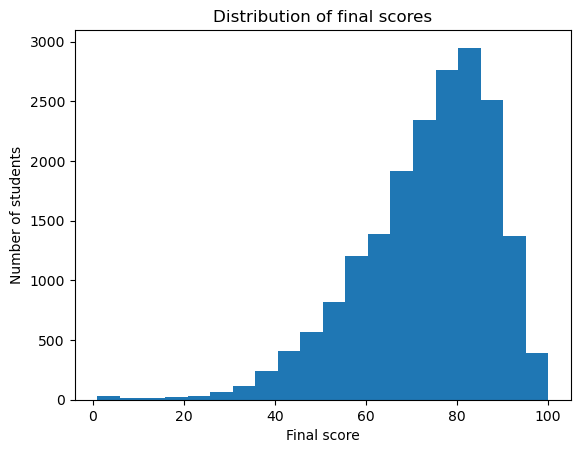

In [70]:
# Plot a histogram of the final_score column
import matplotlib.pyplot as plt
studentInfoDf['final_score'].plot(kind='hist', bins=20)
plt.title('Distribution of final scores')
plt.xlabel('Final score')
plt.ylabel('Number of students')
plt.show()


In [72]:
# Define a function to map final_score to grading_scale categories
def map_grading_scale(final_score):
    if final_score >= 90:
        return 'A+'
    elif final_score >= 85:
        return 'A'
    elif final_score >= 80:
        return 'A-'
    elif final_score >= 77:
        return 'B+'
    elif final_score >= 73:
        return 'B'
    elif final_score >= 70:
        return 'B-'
    elif final_score >= 67:
        return 'C+'
    elif final_score >= 63:
        return 'C'
    elif final_score >= 60:
        return 'C-'
    elif final_score >= 50:
        return 'D'
    else:
        return 'F'

# Apply the function to create the grading_scale column
studentInfoDf['grading_scale'] = studentInfoDf['final_score'].apply(map_grading_scale)

# Print the updated DataFrame
print(studentInfoDf)


      code_module code_presentation  id_student gender                region  \
0             AAA             2013J       11391      M   East Anglian Region   
1             AAA             2013J       28400      F              Scotland   
3             AAA             2013J       31604      F     South East Region   
4             AAA             2013J       32885      F  West Midlands Region   
5             AAA             2013J       38053      M                 Wales   
...           ...               ...         ...    ...                   ...   
32585         GGG             2014J     2606765      F         London Region   
32587         GGG             2014J     2620947      F              Scotland   
32589         GGG             2014J     2645731      F   East Anglian Region   
32590         GGG             2014J     2648187      F          South Region   
32592         GGG             2014J     2684003      F      Yorkshire Region   

           highest_education imd_band a

C:\Users\dgane\AppData\Local\Temp\ipykernel_2068\2244440467.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  studentInfoDf['grading_scale'] = studentInfoDf['final_score'].apply(map_grading_scale)


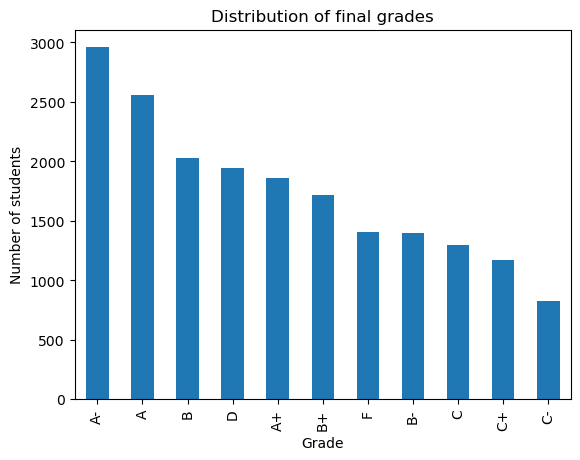

In [73]:
# plot a bar chart of the grading_scale column
studentInfoDf['grading_scale'].value_counts().plot(kind='bar')
plt.title('Distribution of final grades')
plt.xlabel('Grade')
plt.ylabel('Number of students')
plt.show()


In [74]:
# Merge the 'studentInfoDf' and 'coursesDf' DataFrames based on code_module and code_presentation
studentCoursesMergedDf = pd.merge(studentInfoDf, coursesDf, on=['code_module', 'code_presentation'], how='left')

# Print the updated 'student' DataFrame with the 'module_presentation_length' column added
print(studentCoursesMergedDf)

      code_module code_presentation  id_student gender                region  \
0             AAA             2013J       11391      M   East Anglian Region   
1             AAA             2013J       28400      F              Scotland   
2             AAA             2013J       31604      F     South East Region   
3             AAA             2013J       32885      F  West Midlands Region   
4             AAA             2013J       38053      M                 Wales   
...           ...               ...         ...    ...                   ...   
19156         GGG             2014J     2606765      F         London Region   
19157         GGG             2014J     2620947      F              Scotland   
19158         GGG             2014J     2645731      F   East Anglian Region   
19159         GGG             2014J     2648187      F          South Region   
19160         GGG             2014J     2684003      F      Yorkshire Region   

           highest_education imd_band a

In [ ]:
studentCoursesMergedDf.info()
studentCoursesMergedDf.head()

In [77]:
# In studentCoursesMergedDf dataframe 
# Only keep the following columns: ['gender', 'region', 'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts', 'studied_credits', 
# 'disability', 'assessment_type', 'date_average', 'module_presentation_length','grading_scale']
# Assuming studentCoursesMergedDf is a DataFrame
studentCoursesMergedDf = studentCoursesMergedDf[['gender', 'region', 'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts', 'studied_credits', 
'disability', 'assessment_type', 'date_average', 'module_presentation_length','grading_scale']]

studentCoursesMergedDf.info()
studentCoursesMergedDf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19161 entries, 0 to 19160
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   gender                      19161 non-null  object
 1   region                      19161 non-null  object
 2   highest_education           19161 non-null  object
 3   imd_band                    19161 non-null  object
 4   age_band                    19161 non-null  object
 5   num_of_prev_attempts        19161 non-null  int64 
 6   studied_credits             19161 non-null  int64 
 7   disability                  19161 non-null  object
 8   assessment_type             19161 non-null  object
 9   date_average                19161 non-null  int32 
 10  module_presentation_length  19161 non-null  int64 
 11  grading_scale               19161 non-null  object
dtypes: int32(1), int64(3), object(8)
memory usage: 1.7+ MB


,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,assessment_type,date_average,module_presentation_length,grading_scale
0,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,TMA,114,268,C-
1,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,TMA,114,268,A-
2,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,CMA,52,268,A-
3,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,TMA,118,268,B
4,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,TMA,120,268,A+


In [79]:
# Perform one-hot encoding on categorical columns
studentCoursesMergedDf = pd.get_dummies(studentCoursesMergedDf, columns=['gender', 'region', 'highest_education',
                                                            'imd_band', 'age_band', 'disability',
                                                            'assessment_type'])


In [ ]:

print("Shape of encoded DataFrame:", studentCoursesMergedDf.shape)
print(studentCoursesMergedDf.head())

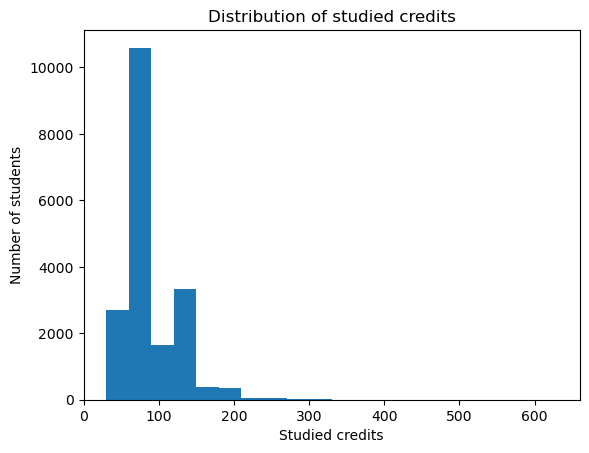

In [81]:
# plot a bar chart of the studied_credits column
studentCoursesMergedDf['studied_credits'].plot(kind='hist', bins=20)
plt.title('Distribution of studied credits')
plt.xlabel('Studied credits')
plt.ylabel('Number of students')
plt.show()


In [83]:
# Print the unique values in the 'studied_credits' column
# convert the values to integers and store them in a list
# print the list sorted ascending

# Assuming 'studentCoursesMergedDf' is a DataFrame that has been defined in a previous cell
unique_studied_credits = studentCoursesMergedDf['studied_credits'].unique()
unique_studied_credits = [int(credit) for credit in unique_studied_credits]
unique_studied_credits.sort()
print(unique_studied_credits)

unique_studied_credits = studentCoursesMergedDf['studied_credits'].unique()
print(unique_studied_credits)


[30, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 130, 135, 140, 145, 150, 155, 160, 165, 170, 180, 190, 195, 200, 210, 215, 220, 225, 240, 250, 270, 280, 300, 325, 330, 360, 420, 430, 630]
[240  60 120  90 150 180 420 170  80 300 210  75 135  70 225 325 130 195
 105 270 165 330 250  30  40  45 160 145 630 100  50 220 110  95 280 155
 190 200 140  85 215  55  65 115 360 430]


In [84]:
# Define bins for the 'studied_credits' column
bins = [0, 30, 60, 90, 120, 150, 180, 210, 240]

# Assuming 'studied_credits' is a column in studentCoursesMergedDf DataFrame and bins is a list of bin edges, use the cut() function to bin the 'studied_credits' column and apply the labels '0-30', '30-60', '60-90', '90-120', '120-150', '150-180', '180-210', '210-240'
studentCoursesMergedDf['studied_credits_binned'] = pd.cut(studentCoursesMergedDf['studied_credits'], bins=bins, labels=['0-30', '30-60', '60-90', '90-120', '120-150', '150-180', '180-210', '210-240'])


In [ ]:
print("Shape of encoded DataFrame:", studentCoursesMergedDf.shape)
print(studentCoursesMergedDf.head())

In [86]:
# Remove the 'studied_credits' column from the DataFrame
studentCoursesMergedDf = studentCoursesMergedDf.drop(columns=['studied_credits'])

# Perform one-hot encoding on 'studied_credits_binned' column
studentCoursesMergedDf = pd.get_dummies(studentCoursesMergedDf, columns=['studied_credits_binned'])

In [ ]:
print("Shape of encoded DataFrame:", studentCoursesMergedDf.shape)
print(studentCoursesMergedDf.head())

In [ ]:
# Plot a bar chart of the 'module_presentation_length' column
import matplotlib.pyplot as plt

# Plotting the bar chart
plt.figure(figsize=(10,6))
coursesDf['module_presentation_length'].value_counts().plot(kind='bar')
plt.title('Bar chart of module_presentation_length')
plt.xlabel('Module Presentation Length')
plt.ylabel('Count')
plt.show()

In [89]:
# Perform one-hot encoding on 'module_presentation_length' column
studentCoursesMergedDf = pd.get_dummies(studentCoursesMergedDf, columns=['module_presentation_length'])

In [ ]:
print("Shape of encoded DataFrame:", studentCoursesMergedDf.shape)
print(studentCoursesMergedDf.head())

In [91]:
# Remove the num_of_prev_attempts column from the DataFrame
studentCoursesMergedDf = studentCoursesMergedDf.drop(columns=['num_of_prev_attempts'])

In [95]:
# Print the smallest and the largest values in the 'date_average' column
print("Smallest value in date_average column:", studentCoursesMergedDf['date_average'].min())
print("Largest value in date_average column:", studentCoursesMergedDf['date_average'].max())



Smallest value in date_average column: 0
Largest value in date_average column: 236


In [96]:
# Define bins for the 'date_average' column
bins = [0, 30, 60, 90, 120, 150, 180, 210, 240]

# Assuming 'date_average' is a column in studentCoursesMergedDf DataFrame and bins is a list of bin edges, use the cut() function to bin the 'date_average' column and apply the labels '0-30', '30-60', '60-90', '90-120', '120-150', '150-180', '180-210', '210-240'
studentCoursesMergedDf['date_average_binned'] = pd.cut(studentCoursesMergedDf['date_average'], bins=bins, labels=['0-30', '30-60', '60-90', '90-120', '120-150', '150-180', '180-210', '210-240'])


In [97]:
# Perform one-hot encoding on 'date_average_binned' column
studentCoursesMergedDf = pd.get_dummies(studentCoursesMergedDf, columns=['date_average_binned'])

# Remove the 'date_average' column from the DataFrame
studentCoursesMergedDf = studentCoursesMergedDf.drop(columns=['date_average'])

print("Shape of encoded DataFrame:", studentCoursesMergedDf.shape)

Shape of encoded DataFrame: (19161, 62)


In [98]:
studentCoursesMergedDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19161 entries, 0 to 19160
Data columns (total 62 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   grading_scale                                  19161 non-null  object
 1   gender_F                                       19161 non-null  bool  
 2   gender_M                                       19161 non-null  bool  
 3   region_East Anglian Region                     19161 non-null  bool  
 4   region_East Midlands Region                    19161 non-null  bool  
 5   region_Ireland                                 19161 non-null  bool  
 6   region_London Region                           19161 non-null  bool  
 7   region_North Region                            19161 non-null  bool  
 8   region_North Western Region                    19161 non-null  bool  
 9   region_Scotland                                19161 non-null

In [99]:
# Create a .csv file named 'studentEncoded.csv' in the 'Data' directory
studentCoursesMergedDf.to_csv('../Data/studentEncoded.csv', index=False)